# 나는 책임이 없다
시작하기 전에 말하자면 나는 수학자도 아니며 통계학자도 아니다. 여기에 설명하는 것은 선배가 후배에게 이런 것이 있다 정도를 알려주기 위함이니 여기 있는 내용을 이해 했다고 하여 다 알았다고 생각해서도 안 되며 틀린 것을 발견했다고 하여 전체 내용이 문제있다고 봐서도 안 된다

## 우선 고유값, 고유벡터에 대해서 알아보고나 가자
고유값 (eigenvalue), 고유벡터 (eigenvector) 라는 개념

다음의 수식
\begin{equation*}
\mathbf{Vx}=\lambda\mathbf{x}
\end{equation*}
여기서 $\mathbf{V}$ 는 정방행렬, $\lambda$ 는 scarla 값, $\mathbf{x}$ 는 vector 일 때 $\lambda$ 를 고유값이라 정의하고 $\mathbf{x}$는 고유벡터라고 한다.
이에 대한 풀이는 http://darkpgmr.tistory.com/105 의 5번 항에  에 잘 정리 되어 있으므로 일단 잠시 보고 가자 



# 그럼 실제로 그런지 한번 봐보자

아래 예 에서 고유값 $\lambda$ 는 3과 1 이고 이때의 eigen vector 는 $(1,1)$ 이 된다.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def set_axes(ax,axlen=10):
    ax.set_xlim([-axlen,axlen]); ax.set_ylim([-axlen,axlen])
    ax.spines['bottom'].set_position(('data',0));ax.spines['left'].set_position(('data',0))
    ax.spines['top'].set_color('none'); ax.spines['right'].set_color('none')
def drawArrow(ax,a,b,debug=False):
    offset=0.5
    if debug: print("%s -> %s" %(str(a),str(b)))
    ax.arrow(a[0],a[1],b[0]-a[0],b[1]-a[1],head_width=offset,head_length=offset,fc='k',ec='k')



[1.5054101  2.48452169] -> [0.5262985  6.47445348]
[2.54564901 0.23384515] -> [4.85745287 3.0133393 ]
[2.52610275 2.18391034] -> [2.86829516 6.89392343]


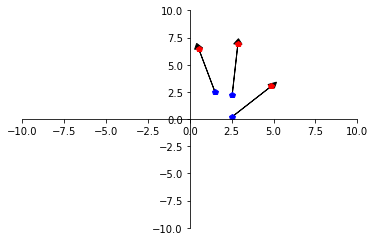

In [38]:
A=np.array([[2,-1],[1,2]])
v1=np.array([1,1]); t1=np.dot(A,v1)
v2=np.array([1,3]); t2=np.dot(A,v2)

#vv=np.array([[1,-1,-1,1],[1,1,-1,-1]]); tt=np.dot(A,vv)
vv=np.random.rand(2,3)*3; tt=np.dot(A,vv)

fig=plt.figure(); ax = fig.add_subplot(1,1,1)
set_axes(ax)
ax.plot(vv[0],vv[1],"p",color='blue')
ax.plot(tt[0],tt[1],"p",color='red')
for ii in range(vv.shape[1]):
    drawArrow(ax,vv[:,ii],tt[:,ii],debug=True)

plt.show()

# PCA 를 한번 봐보자

In [1]:
# 코드 예제

import numpy as np


# PCA 와 SVD 의 관계는 무엇인가?
나도 잘 모른다 그냥 그리스 신화와 로마 신화의 관계 같다고나 할까 그 신이 그 신이고 이 신이 이 신인데 이름만 이랬다가 저랬다가 같은 것?
즉 고유갑=특이값, 고유벡터=특이벡터 ??

# 우리에게 가장 친숙한 예로 마쳐보자
svd 를 이용한 CNV 분석의 의미